In [1]:
import torch
from torchvision import datasets, models, transforms
from torchvision.utils import make_grid
from torchvision import transforms
from torch import np
import torch.optim as optim
from torch.autograd import Variable
import torch.nn as nn

In [2]:
import utils
%matplotlib inline

In [3]:
# hyperparameters
batch_size = 8

In [4]:
# TODO: consider using DenseNet instead
# https://github.com/yunjey/pytorch-tutorial/blob/master/tutorials/02-intermediate/deep_residual_network/main.py

# Image Preprocessing 
normalize = transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
data_transforms = {
    'train': transforms.Compose([
        transforms.Scale(64),
        #transforms.RandomSizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        normalize
    ])
}

# load CIFAR10 dataset
DATA_PATH = './data/CIFAR10/'

train_dataset = datasets.CIFAR10(root=DATA_PATH,
                                 train=True, 
                                 transform=data_transforms['train'], 
                                 download=True)

# Data Loader (Input Pipeline)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

LABEL_PATH = 'data/CIFAR10/cifar-10-batches-py/batches.meta'
label_names = utils.unpickle(LABEL_PATH)['label_names']


Files already downloaded and verified


In [10]:
# load pretrained ResNet18 model 
original_model = models.resnet18(pretrained=True)
model = utils.FeatureExtractor(original_model)

# freeze weights
for param in model.parameters():
    param.requires_grad = False


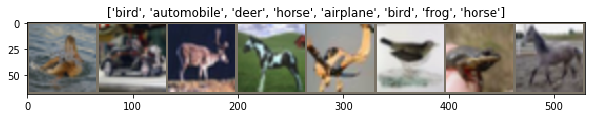

In [11]:
(images, labels) = next(iter(train_loader))
out = make_grid(images)
utils.imshow(out,figsize=(10,15),title=[label_names[x] for x in labels])

In [12]:
images = Variable(images)
labels = Variable(labels)

outputs = model(images) # batch_size x channels x width x height, 
                        # 8 x 256 x 4 x 4

In [9]:
print model

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(model)? (<ipython-input-9-1e691f59c9a2>, line 1)

In [10]:
print(train_dataset)

In [14]:
"""
This requires the COCO API.

$ git clone https://github.com/cocodataset/cocoapi
$ cd cocoapi/PythonAPI/
$ make
"""

from pycocotools.coco import COCO
from dataset_utils import download_and_extract
import os


def coco(dataDir='data', dataType='val2017'):
  """
  Possible dataTypes are found at http://cocodataset.org/#download
  """
  
  baseURL = 'http://images.cocodataset.org/zips/{}.zip'
  url = baseURL.format(dataType)
  download_and_extract(url, dst=dataDir)
  return os.path.join(dataDir, dataType)

def annotations(dataDir='data', 
                url='http://images.cocodataset.org/annotations/annotations_trainval2017.zip', 
                dataTypes=['train2017', 'val2017']):
  download_and_extract(url, dst=dataDir)
  annFile = '{}/annotations/captions_{}.json'
  annFiles = map(lambda dataType: annFile.format(dataDir, dataType), dataTypes)
  return [annFile for annFile in annFiles]

In [ ]:
"""
Downloads COCO and fetches captions
"""
dataDir = 'data'

# change to train etc if we want lots of data
root_dir = coco(dataType='val2017')
annFile_train, annFile_val = annotations(dataDir)
train_dataset = datasets.CocoCaptions(root=root_dir,
                                      annFile=annFile_val,
                                      transform=data_transforms['train'])

loading annotations into memory...
Done (t=0.06s)
creating index...
index created!
A man riding a surfboard inside of a wave.
an image of a man riding the ocean waves on his surfboard
There is a surfer on a surfboard in a pipeline
A man surfing through a very large wave that is coming over his head.
A surfer rides his board inside an arching wave.


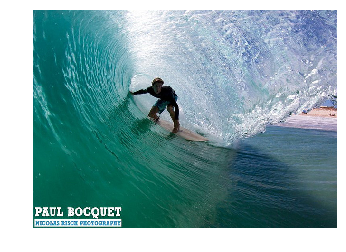

In [32]:
import matplotlib.pyplot as plt
import skimage.io as io

coco=COCO(annFile_val)

imgIds = coco.getImgIds()
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

I = io.imread(img['coco_url'])

annIds = coco.getAnnIds(imgIds=img['id']);
anns = coco.loadAnns(annIds)
coco.showAnns(anns)
plt.imshow(I); plt.axis('off'); plt.show()